### 이미지 데이터 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# os (Operating System) : 파일이나 디렉토리 등 운영체제에서 제공되는
#                         여러 기능을 파이썬에서 수행하게 해주는 라이브러리
import os

In [2]:
H_dir = "햄스터/"
C_dir = "고양이/"
M_dir = "미어캣/"

In [3]:
# listdir : 지정된 디렉토리 내의 모든 파일명을 리스트로 변환

H_fnames = os.listdir(H_dir)
C_fnames = os.listdir(C_dir)
M_fnames = os.listdir(M_dir)

In [4]:
H_fnames

['1.png',
 '10.png',
 '100.png',
 '101.png',
 '102.png',
 '103.png',
 '104.png',
 '105.png',
 '106.png',
 '107.png',
 '108.png',
 '109.png',
 '11.png',
 '110.png',
 '111.png',
 '112.png',
 '113.png',
 '114.png',
 '115.png',
 '116.png',
 '117.png',
 '118.png',
 '119.png',
 '12.png',
 '120.png',
 '121.png',
 '122.png',
 '123.png',
 '124.png',
 '125.png',
 '126.png',
 '127.png',
 '128.png',
 '129.png',
 '13.png',
 '130.png',
 '131.png',
 '132.png',
 '133.png',
 '134.png',
 '135.png',
 '136.png',
 '137.png',
 '138.png',
 '139.png',
 '14.png',
 '140.png',
 '141.png',
 '142.png',
 '143.png',
 '144.png',
 '145.png',
 '146.png',
 '147.png',
 '148.png',
 '149.png',
 '15.png',
 '150.png',
 '151.png',
 '152.png',
 '153.png',
 '154.png',
 '155.png',
 '156.png',
 '157.png',
 '158.png',
 '159.png',
 '16.png',
 '160.png',
 '161.png',
 '162.png',
 '163.png',
 '164.png',
 '165.png',
 '166.png',
 '167.png',
 '168.png',
 '169.png',
 '17.png',
 '170.png',
 '171.png',
 '172.png',
 '173.png',
 '174.png',
 '

In [5]:
test_path = os.path.join(H_dir, H_fnames[10])
test_path

'햄스터/108.png'

In [6]:
# 폴더 경로와 파일명, 이미지의 사이즈를 매개변수로 받아 이미지를 받고
# 배열로 만들어주는 사용자 정의 함수 생성

def load_images(folder_path, file_names, img_size_shape=(224, 224)) : 
    images = []
    for i in file_names : 
        # 카테고리 별, 각 파일명들의 전체 경로 설정 
        path = os.path.join(folder_path, i)
        # 이미지를 경로에 맞게 불러오고 사이즈 변경 후 컬러로 저장
        img = Image.open(path).resize(img_size_shape).convert("RGB")
        # 이미지를 배열로 변환시킨 데이터를 바로 비어있는 리스트에 저장
        images.append(np.array(img))
    # 리스트 자체도 배열로 변환시켜서 반환
    return np.array(images)

In [7]:
train_H = load_images(H_dir, H_fnames)
train_C = load_images(C_dir, C_fnames)
train_M = load_images(M_dir, M_fnames)

In [8]:
print(train_H.shape)
print(train_C.shape)
print(train_M.shape)

(400, 224, 224, 3)
(400, 224, 224, 3)
(400, 224, 224, 3)


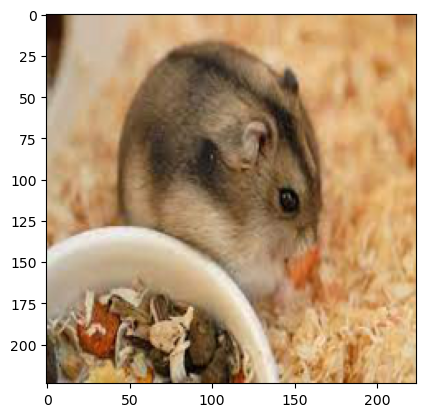

In [9]:
plt.imshow(train_H[0]);

In [10]:
# 문제 데이터 생성 (1200개 데이터)

X = np.concatenate([train_H, train_C, train_M])

In [11]:
len(train_M)

400

In [12]:
# 정답 데이터 생성 (데이터 400, 400, 400)
# 햄스터 : 0, 고양이 : 1, 미어캣 : 2

y = np.array([0]*400 + [1]*400 + [2]*400)

In [13]:
print(X.shape)
print(y.shape)

(1200, 224, 224, 3)
(1200,)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 224, 224, 3)
(240, 224, 224, 3)
(960,)
(240,)


### NPZ (Numpy Zip)

- 배열 데이터를 압축해서 저장한 파일 형식

In [18]:
np.savez_compressed("animals.npz", # 저장될 경로 및 파일명 설정
                    X_train = X_train,
                    X_test = X_test,
                    y_train = y_train,
                    y_test = y_test
                    )